AttributeError: 'str' object has no attribute 'get_array'

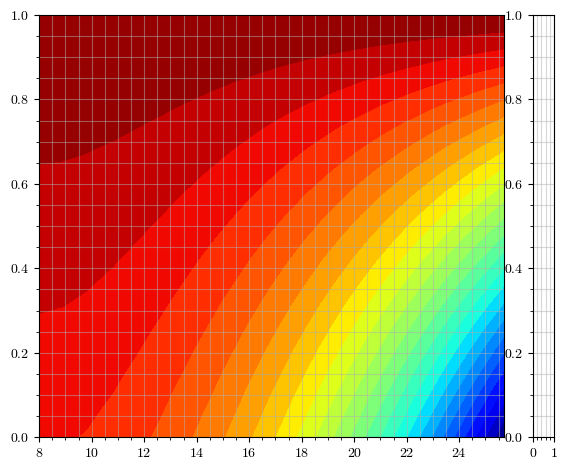

In [15]:
from os import sys
import os
sys.path.append('../')

%matplotlib widget

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from aircraft import airplane
import propellers as prop

plt.style.use('../basic_plotter.mplstyle')

# Simple aerodynamic Model of Vehicle
CD0 = 0.018         # Zero lift drag coefficient
k   = 0.03          # Induced drag coefficient (1/(pi*AR*e))

# Static conditions
rho0 = 1.225        # Standard seal level air density for now

createv = airplane(13.0, 0.395, 6.28)
createv_prop = prop.aeronaut185x12()

# Operating point variation
V_inf = np.linspace(8, 25.7, 20)      # Airspeed in meters per second to check operating point
throttle = np.linspace(0, 1, 20)       # Throttle as a floating fraction, for defining thrust as fraction of cruise thrust

V_INF, THROTTLE = np.meshgrid(V_inf, throttle)

q = 0.5 * rho0 * V_INF**2
X_T_createv_cruise = (CD0 * q * createv.area) + (k * (q*createv.area)**-1 * createv.weight**2)

t1 = X_T_createv_cruise * THROTTLE

h_dot = (-X_T_createv_cruise * V_INF * createv.weight**-1) + (t1 * V_INF * createv.weight**-1)

plt.figure()
plt.contourf(V_INF, THROTTLE, h_dot, cmap="jet", levels=30)
plt.colorbar()
plt.show()

In [3]:

# Getting Estimates for propeller RPM
createv_rpm = np.zeros(np.shape(V_inf))

for i, v in enumerate(V_inf):
    createv_rpm[i] = createv_prop.getRPM(X_T_createv[i], rho0, v)

plt.figure()
plt.plot(V_inf, X_T_createv, label='CREATeV Specifications')
plt.legend()
plt.xlabel("$V_\inf$")
plt.ylabel("$X_T$ (N)")
plt.show()

plt.figure()
plt.plot(V_inf, createv_rpm, label='CREATeV Specifications')
plt.legend()
plt.xlabel("$V_\inf$ (m/s)")
plt.ylabel("Revs per Second")
plt.show()

NameError: name 'X_T_createv' is not defined

In [ ]:
data = {"Airspeed": V_inf, "Thrust": X_T_createv, "Rev/s": createv_rpm}
data = pd.DataFrame(data)
data

,Airspeed,Thrust,Rev/s
0,8.000000,6.764925,41.161250
1,8.931579,6.204785,41.553888
2,9.863158,5.959549,42.761007
3,10.794737,5.941021,44.524187
4,11.726316,6.094577,46.678192
5,12.657895,6.384921,49.112950
6,13.589474,6.788422,51.752738
7,14.521053,7.288779,54.544275
8,15.452632,7.874448,57.449482
9,16.384211,8.537073,60.440804


In [ ]:
V_inf

array([ 8.        ,  8.93157895,  9.86315789, 10.79473684, 11.72631579,
       12.65789474, 13.58947368, 14.52105263, 15.45263158, 16.38421053,
       17.31578947, 18.24736842, 19.17894737, 20.11052632, 21.04210526,
       21.97368421, 22.90526316, 23.83684211, 24.76842105, 25.7       ])

In [ ]:
X_T_createv

array([ 6.7649253 ,  6.20478542,  5.95954902,  5.94102069,  6.09457666,
        6.38492056,  6.78842218,  7.2887787 ,  7.87444802,  8.53707301,
        9.27048221, 10.07003811, 10.9322014 , 11.85423301, 12.83398647,
       13.86976042, 14.96019227, 16.1041804 , 17.30082638, 18.54939157])

In [ ]:
createv_rpm

array([41.16124972, 41.55388754, 42.76100728, 44.52418742, 46.67819182,
       49.11294964, 51.75273784, 54.54427491, 57.44948181, 60.44080376,
       63.49808107, 66.60640896, 69.75465301, 72.93441279, 76.1392858 ,
       79.36435298, 82.6057692 , 85.86055626, 89.12634125, 92.4012376 ])